In [194]:
import streamlit as st
import pandas as pd
import numpy as np
import streamlit as st
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_jumlah_penduduk = pd.read_excel("data/raw-data/Jumlah Penduduk Menurut Kabupaten_Kota 2015-2020.xlsx")
df_jumlah_miskin = pd.read_csv("data/raw-data/Jumlah Penduduk Miskin Menurut Kabupaten_Kota 2002-2020.csv")
df_persentase_stunting = pd.read_csv("data/raw-data/Persentase Balita Stunting Berdasarkan Kabupaten_Kota 2014-2021.csv")
df_jumlah_stunting = pd.read_csv("data/raw-data/Jumlah Balita Stunting Berdasarkan Kabupaten_Kota 2014-2021.csv")

In [195]:
df_jumlah_penduduk.head()

,Wilayah Jawa Barat,2015,2016,2017,2018,2019,2020
0,Provinsi Jawa Barat,46709569,47379389,48037827,48683861,49316712,49935858
1,Bogor,5459668,5587390,5715009,5840907,5965410,6088233
2,Sukabumi,2434221,2444616,2453498,2460693,2466272,2470219
3,Cianjur,2243904,2250977,2256589,2260620,2263072,2264328
4,Bandung,3534114,3596623,3657601,3717291,3775279,3831505


In [196]:
df_jumlah_miskin.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_miskin,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,451.3,RIBU JIWA,2002
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,362.2,RIBU JIWA,2002
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,368.6,RIBU JIWA,2002
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,543.3,RIBU JIWA,2002
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,323.7,RIBU JIWA,2002


In [197]:
df_persentase_stunting.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_balita_stunting,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9.04,PERSEN,2014
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,12.21,PERSEN,2014
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14.33,PERSEN,2014
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,17.14,PERSEN,2014
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,7.12,PERSEN,2014


In [198]:
df_jumlah_penduduk.rename(columns = {'Wilayah Jawa Barat':'nama_kabupaten_kota'}, inplace = True)
df_jumlah_penduduk.drop(0, axis=0, inplace=True)
df_jumlah_penduduk.head()

,nama_kabupaten_kota,2015,2016,2017,2018,2019,2020
1,Bogor,5459668,5587390,5715009,5840907,5965410,6088233
2,Sukabumi,2434221,2444616,2453498,2460693,2466272,2470219
3,Cianjur,2243904,2250977,2256589,2260620,2263072,2264328
4,Bandung,3534114,3596623,3657601,3717291,3775279,3831505
5,Garut,2548723,2569505,2588839,2606399,2622425,2636637


In [199]:
for index, row in df_jumlah_penduduk.iterrows():
    if str(row["nama_kabupaten_kota"]).find("Kota") != -1:
        df_jumlah_penduduk.at[index,'nama_kabupaten_kota']= str(row["nama_kabupaten_kota"]).upper()
    else:
        df_jumlah_penduduk.at[index,'nama_kabupaten_kota']= "KABUPATEN " + str(row["nama_kabupaten_kota"]).upper()

df_jumlah_penduduk.head()

,nama_kabupaten_kota,2015,2016,2017,2018,2019,2020
1,KABUPATEN BOGOR,5459668,5587390,5715009,5840907,5965410,6088233
2,KABUPATEN SUKABUMI,2434221,2444616,2453498,2460693,2466272,2470219
3,KABUPATEN CIANJUR,2243904,2250977,2256589,2260620,2263072,2264328
4,KABUPATEN BANDUNG,3534114,3596623,3657601,3717291,3775279,3831505
5,KABUPATEN GARUT,2548723,2569505,2588839,2606399,2622425,2636637


In [200]:
df_jumlah_penduduk.set_index("nama_kabupaten_kota", inplace=True)
df_jumlah_penduduk.sort_index(inplace=True)
df_jumlah_penduduk.head()

,2015,2016,2017,2018,2019,2020
nama_kabupaten_kota,,,,,,
KABUPATEN BANDUNG,3534114,3596623,3657601,3717291,3775279,3831505
KABUPATEN BANDUNG BARAT,1629423,1648387,1666510,1683711,1699896,1714982
KABUPATEN BEKASI,3246013,3371691,3500023,3630907,3763886,3899017
KABUPATEN BOGOR,5459668,5587390,5715009,5840907,5965410,6088233
KABUPATEN CIAMIS,1168682,1175389,1181981,1188629,1195176,1201685


In [201]:
df_jumlah_penduduk.columns = pd.to_datetime(df_jumlah_penduduk.columns.astype(int).astype(str))
df_jumlah_penduduk.head()

,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
nama_kabupaten_kota,,,,,,
KABUPATEN BANDUNG,3534114,3596623,3657601,3717291,3775279,3831505
KABUPATEN BANDUNG BARAT,1629423,1648387,1666510,1683711,1699896,1714982
KABUPATEN BEKASI,3246013,3371691,3500023,3630907,3763886,3899017
KABUPATEN BOGOR,5459668,5587390,5715009,5840907,5965410,6088233
KABUPATEN CIAMIS,1168682,1175389,1181981,1188629,1195176,1201685


In [202]:
df_jumlah_penduduk = df_jumlah_penduduk.T.reset_index()
df_jumlah_penduduk.head()

nama_kabupaten_kota,index,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,...,KABUPATEN TASIKMALAYA,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA
0,2015-01-01,3534114,1629423,3246013,5459668,1168682,2243904,2126179,2548723,1691386,...,1735998,2481469,181425,2714825,1047922,586580,307494,2106102,318117,657477
1,2016-01-01,3596623,1648387,3371691,5587390,1175389,2250977,2142999,2569505,1700815,...,1742276,2490622,181901,2787205,1064687,594021,310486,2179813,321097,659606
2,2017-01-01,3657601,1666510,3500023,5715009,1181981,2256589,2159577,2588839,1709994,...,1747318,2497938,182388,2859630,1081009,601099,313325,2254513,323788,661404
3,2018-01-01,3717291,1683711,3630907,5840907,1188629,2260620,2176213,2606399,1719187,...,1751295,2503708,182819,2931897,1096828,607811,316277,2330333,326282,662723
4,2019-01-01,3775279,1699896,3763886,5965410,1195176,2263072,2192903,2622425,1728469,...,1754128,2507888,183110,3003923,1112081,614304,319312,2406826,328680,663517


In [203]:
df_jumlah_penduduk.rename(columns={"index": "tahun"}, inplace=True)
df_jumlah_penduduk.set_index("tahun", inplace=True)
df_jumlah_penduduk.sort_index(inplace=True)
df_jumlah_penduduk['JAWA BARAT'] = df_jumlah_penduduk.sum(axis=1)
df_jumlah_penduduk.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA,JAWA BARAT
tahun,,,,,,,,,,,,,,,,,,,,,
2015-01-01,3534114,1629423,3246013,5459668,1168682,2243904,2126179,2548723,1691386,2273579,...,2481469,181425,2714825,1047922,586580,307494,2106102,318117,657477,46709569
2016-01-01,3596623,1648387,3371691,5587390,1175389,2250977,2142999,2569505,1700815,2295778,...,2490622,181901,2787205,1064687,594021,310486,2179813,321097,659606,47379389
2017-01-01,3657601,1666510,3500023,5715009,1181981,2256589,2159577,2588839,1709994,2316489,...,2497938,182388,2859630,1081009,601099,313325,2254513,323788,661404,48037827
2018-01-01,3717291,1683711,3630907,5840907,1188629,2260620,2176213,2606399,1719187,2336009,...,2503708,182819,2931897,1096828,607811,316277,2330333,326282,662723,48683861
2019-01-01,3775279,1699896,3763886,5965410,1195176,2263072,2192903,2622425,1728469,2353915,...,2507888,183110,3003923,1112081,614304,319312,2406826,328680,663517,49316712


In [204]:
df_jumlah_miskin = df_jumlah_miskin.loc[:, ['nama_kabupaten_kota', 'jumlah_penduduk_miskin', 'tahun']]
df_jumlah_miskin['jumlah_penduduk_miskin'] = df_jumlah_miskin['jumlah_penduduk_miskin']*1000
df_jumlah_miskin.head()

,nama_kabupaten_kota,jumlah_penduduk_miskin,tahun
0,KABUPATEN BOGOR,451300.0,2002
1,KABUPATEN SUKABUMI,362200.0,2002
2,KABUPATEN CIANJUR,368600.0,2002
3,KABUPATEN BANDUNG,543300.0,2002
4,KABUPATEN GARUT,323700.0,2002


In [205]:
years_to_keep = [2015, 2016, 2017, 2018, 2019, 2020]
rows_to_drop = []

for index, row in df_jumlah_miskin.iterrows():
    if row["tahun"] not in years_to_keep:
        rows_to_drop.append(index)

df_jumlah_miskin.drop(rows_to_drop, inplace=True)
df_jumlah_miskin = df_jumlah_miskin.pivot(index="nama_kabupaten_kota", columns="tahun", values="jumlah_penduduk_miskin")
df_jumlah_miskin.rename_axis(columns=None, inplace=True)
df_jumlah_miskin.head()

,2015,2016,2017,2018,2019,2020
nama_kabupaten_kota,,,,,,
KABUPATEN BANDUNG,281000.0,272700.0,268000.0,246100.0,223210.0,263600.0
KABUPATEN BANDUNG BARAT,205700.0,192500.0,190900.0,169000.0,159030.0,179460.0
KABUPATEN BEKASI,169200.0,164400.0,164000.0,157200.0,149430.0,186300.0
KABUPATEN BOGOR,487100.0,490800.0,487300.0,415000.0,395030.0,465670.0
KABUPATEN CIAMIS,104900.0,98800.0,96800.0,85700.0,79410.0,91390.0


In [206]:
df_jumlah_miskin.columns = pd.to_datetime(df_jumlah_miskin.columns.astype(int).astype(str))
df_jumlah_miskin.head()

,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
nama_kabupaten_kota,,,,,,
KABUPATEN BANDUNG,281000.0,272700.0,268000.0,246100.0,223210.0,263600.0
KABUPATEN BANDUNG BARAT,205700.0,192500.0,190900.0,169000.0,159030.0,179460.0
KABUPATEN BEKASI,169200.0,164400.0,164000.0,157200.0,149430.0,186300.0
KABUPATEN BOGOR,487100.0,490800.0,487300.0,415000.0,395030.0,465670.0
KABUPATEN CIAMIS,104900.0,98800.0,96800.0,85700.0,79410.0,91390.0


In [207]:
df_jumlah_miskin = df_jumlah_miskin.T.reset_index()
df_jumlah_miskin.rename(columns={"index": "tahun"}, inplace=True)
df_jumlah_miskin.set_index("tahun", inplace=True)
df_jumlah_miskin.sort_index(inplace=True)
df_jumlah_miskin['JAWA BARAT'] = df_jumlah_miskin.sum(axis=1)
df_jumlah_miskin.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA,JAWA BARAT
tahun,,,,,,,,,,,,,,,,,,,,,
2015-01-01,281000.0,205700.0,169200.0,487100.0,104900.0,273900.0,313200.0,325700.0,253100.0,235000.0,...,114100.0,13400.0,146900.0,79200.0,34100.0,31700.0,50000.0,27800.0,106800.0,4435600.0
2016-01-01,272700.0,192500.0,164400.0,490800.0,98800.0,261400.0,288500.0,298500.0,237000.0,230600.0,...,107600.0,12700.0,140000.0,77300.0,35100.0,30200.0,50600.0,27500.0,102800.0,4224600.0
2017-01-01,268000.0,190900.0,164000.0,487300.0,96800.0,257400.0,279600.0,291200.0,233400.0,236800.0,...,104000.0,12900.0,136000.0,76500.0,34500.0,30200.0,52300.0,27400.0,97900.0,4168700.0
2018-01-01,246100.0,169000.0,157200.0,415000.0,85700.0,221600.0,232400.0,241300.0,204200.0,188000.0,...,89400.0,10400.0,119800.0,64900.0,29900.0,28000.0,49400.0,23200.0,84200.0,3615700.0
2019-01-01,223210.0,159030.0,149430.0,395030.0,79410.0,207070.0,217640.0,235190.0,191860.0,173660.0,...,84670.0,10070.0,113650.0,63970.0,26910.0,26800.0,49350.0,21870.0,76980.0,3399200.0


In [208]:
percentage = ((df_jumlah_miskin / df_jumlah_penduduk) * 100).round(3)

df_percentage_miskin = pd.DataFrame(percentage, index=df_jumlah_miskin.index, columns=df_jumlah_miskin.columns)
df_percentage_miskin.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA,JAWA BARAT
tahun,,,,,,,,,,,,,,,,,,,,,
2015-01-01,7.951,12.624,5.213,8.922,8.976,12.206,14.731,12.779,14.964,10.336,...,4.598,7.386,5.411,7.558,5.813,10.309,2.374,8.739,16.244,9.496
2016-01-01,7.582,11.678,4.876,8.784,8.406,11.613,13.462,11.617,13.934,10.045,...,4.320,6.982,5.023,7.260,5.909,9.727,2.321,8.564,15.585,8.917
2017-01-01,7.327,11.455,4.686,8.527,8.190,11.407,12.947,11.248,13.649,10.222,...,4.163,7.073,4.756,7.077,5.739,9.639,2.320,8.462,14.802,8.678
2018-01-01,6.620,10.037,4.329,7.105,7.210,9.803,10.679,9.258,11.878,8.048,...,3.571,5.689,4.086,5.917,4.919,8.853,2.120,7.110,12.705,7.427
2019-01-01,5.912,9.355,3.970,6.622,6.644,9.150,9.925,8.968,11.100,7.377,...,3.376,5.499,3.783,5.752,4.381,8.393,2.050,6.654,11.602,6.893


In [209]:
df_percentage_miskin.to_csv('data/cleaned-data/Persentase Kemiskinan 2015-2020.csv')

In [210]:
df_persentase_stunting = df_persentase_stunting.loc[:, ['nama_kabupaten_kota', 'persentase_balita_stunting', 'tahun']]
df_persentase_stunting.head()

,nama_kabupaten_kota,persentase_balita_stunting,tahun
0,KABUPATEN BOGOR,9.04,2014
1,KABUPATEN SUKABUMI,12.21,2014
2,KABUPATEN CIANJUR,14.33,2014
3,KABUPATEN BANDUNG,17.14,2014
4,KABUPATEN GARUT,7.12,2014


In [211]:
years_to_keep = [2015, 2016, 2017, 2018, 2019, 2020]
rows_to_drop = []

for index, row in df_persentase_stunting.iterrows():
    if row["tahun"] not in years_to_keep:
        rows_to_drop.append(index)

df_persentase_stunting.drop(rows_to_drop, inplace=True)
df_persentase_stunting = df_persentase_stunting.pivot(index="nama_kabupaten_kota", columns="tahun", values="persentase_balita_stunting")
df_persentase_stunting.rename_axis(columns=None, inplace=True)
df_persentase_stunting.head()

,2015,2016,2017,2018,2019,2020
nama_kabupaten_kota,,,,,,
KABUPATEN BANDUNG,8.34,7.52,9.62,7.91,7.32,15.77
KABUPATEN BANDUNG BARAT,11.56,7.92,8.00,6.94,7.60,13.57
KABUPATEN BEKASI,8.93,5.40,4.25,4.77,3.42,4.27
KABUPATEN BOGOR,7.38,6.87,5.38,1.08,4.06,11.47
KABUPATEN CIAMIS,2.83,10.40,8.55,6.47,7.33,11.24


In [212]:
df_persentase_stunting.columns = pd.to_datetime(df_persentase_stunting.columns.astype(int).astype(str))
df_persentase_stunting.head()

,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
nama_kabupaten_kota,,,,,,
KABUPATEN BANDUNG,8.34,7.52,9.62,7.91,7.32,15.77
KABUPATEN BANDUNG BARAT,11.56,7.92,8.00,6.94,7.60,13.57
KABUPATEN BEKASI,8.93,5.40,4.25,4.77,3.42,4.27
KABUPATEN BOGOR,7.38,6.87,5.38,1.08,4.06,11.47
KABUPATEN CIAMIS,2.83,10.40,8.55,6.47,7.33,11.24


In [213]:
df_persentase_stunting = df_persentase_stunting.T.reset_index()
df_persentase_stunting.rename(columns={"index": "tahun"}, inplace=True)
df_persentase_stunting.set_index("tahun", inplace=True)
df_persentase_stunting.sort_index(inplace=True)
df_persentase_stunting.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KABUPATEN TASIKMALAYA,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA
tahun,,,,,,,,,,,,,,,,,,,,,
2015-01-01,8.34,11.56,8.93,7.38,2.83,14.94,12.56,7.67,21.44,14.09,...,16.75,12.83,4.56,7.39,10.37,15.81,11.64,17.35,8.96,6.77
2016-01-01,7.52,7.92,5.40,6.87,10.40,13.42,13.42,6.81,23.49,13.82,...,15.75,6.43,8.67,11.06,7.58,14.18,12.43,7.01,10.57,14.01
2017-01-01,9.62,8.00,4.25,5.38,8.55,13.92,11.12,12.65,23.06,14.18,...,15.26,1.99,7.96,11.43,6.59,14.54,13.69,5.94,8.98,13.12
2018-01-01,7.91,6.94,4.77,1.08,6.47,6.57,10.29,12.07,20.51,18.75,...,15.71,7.56,8.24,18.18,4.80,9.75,10.10,5.41,12.13,10.79
2019-01-01,7.32,7.60,3.42,4.06,7.33,6.61,7.93,4.80,15.39,4.17,...,15.06,6.53,7.61,10.69,4.54,9.06,11.21,4.55,9.31,10.95


In [214]:
df_jumlah_stunting.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_balita_stunting,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,40314,ORANG,2014
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,25332,ORANG,2014
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,26687,ORANG,2014
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,46412,ORANG,2014
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,14609,ORANG,2014


In [215]:
df_jumlah_stunting = df_jumlah_stunting.loc[:, ['nama_kabupaten_kota', 'jumlah_balita_stunting', 'tahun']]
df_jumlah_stunting['jumlah_balita_stunting'] = df_jumlah_stunting['jumlah_balita_stunting']
df_jumlah_stunting.head()

,nama_kabupaten_kota,jumlah_balita_stunting,tahun
0,KABUPATEN BOGOR,40314,2014
1,KABUPATEN SUKABUMI,25332,2014
2,KABUPATEN CIANJUR,26687,2014
3,KABUPATEN BANDUNG,46412,2014
4,KABUPATEN GARUT,14609,2014


In [216]:
years_to_keep = [2015, 2016, 2017, 2018, 2019, 2020]
rows_to_drop = []

for index, row in df_jumlah_stunting.iterrows():
    if row["tahun"] not in years_to_keep:
        rows_to_drop.append(index)

df_jumlah_stunting.drop(rows_to_drop, inplace=True)
df_jumlah_stunting = df_jumlah_stunting.pivot(index="nama_kabupaten_kota", columns="tahun", values="jumlah_balita_stunting")
df_jumlah_stunting.rename_axis(columns=None, inplace=True)
df_jumlah_stunting.head()

,2015,2016,2017,2018,2019,2020
nama_kabupaten_kota,,,,,,
KABUPATEN BANDUNG,16357,20391,12272,21131,19121,29581
KABUPATEN BANDUNG BARAT,14809,10734,10487,7578,9322,15440
KABUPATEN BEKASI,20699,10843,3861,6045,7436,9373
KABUPATEN BOGOR,33721,32035,23797,7642,18752,34020
KABUPATEN CIAMIS,2236,4092,5831,4847,4254,7688


In [217]:
df_jumlah_stunting.columns = pd.to_datetime(df_jumlah_stunting.columns.astype(int).astype(str))
df_jumlah_stunting.head()

,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
nama_kabupaten_kota,,,,,,
KABUPATEN BANDUNG,16357,20391,12272,21131,19121,29581
KABUPATEN BANDUNG BARAT,14809,10734,10487,7578,9322,15440
KABUPATEN BEKASI,20699,10843,3861,6045,7436,9373
KABUPATEN BOGOR,33721,32035,23797,7642,18752,34020
KABUPATEN CIAMIS,2236,4092,5831,4847,4254,7688


In [218]:
df_jumlah_stunting = df_jumlah_stunting.T.reset_index()
df_jumlah_stunting.rename(columns={"index": "tahun"}, inplace=True)
df_jumlah_stunting.set_index("tahun", inplace=True)
df_jumlah_stunting.sort_index(inplace=True)
df_jumlah_stunting.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KABUPATEN TASIKMALAYA,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA
tahun,,,,,,,,,,,,,,,,,,,,,
2015-01-01,16357,14809,20699,33721,2236,26582,22667,16624,17049,24795,...,18697,2778,1194,8952,1975,7769,18145,6298,12142,908
2016-01-01,20391,10734,10843,32035,4092,26666,24626,15305,26430,23411,...,17563,9194,1154,16707,6794,5605,2767,8850,2457,7145
2017-01-01,12272,10487,3861,23797,5831,27625,20017,6619,18227,16865,...,17588,2506,1036,18215,5538,3447,2953,6835,2161,6572
2018-01-01,21131,7578,6045,7642,4847,12476,11082,10368,25558,18436,...,18644,10048,1054,8087,4050,3585,2253,6751,2826,5149
2019-01-01,19121,9322,7436,18752,4254,12761,14127,9723,19458,4940,...,17254,8121,962,11737,3757,3269,2411,5241,2069,5373


In [219]:
df_jumlah_balita = (df_jumlah_stunting/df_persentase_stunting)*100
df_jumlah_balita['JAWA BARAT'] = df_jumlah_balita.sum(axis=1)
df_jumlah_stunting['JAWA BARAT'] = df_jumlah_stunting.sum(axis=1)
df_persentase_stunting = ((df_jumlah_stunting/df_jumlah_balita)*100).round(3)
df_persentase_stunting.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA,JAWA BARAT
tahun,,,,,,,,,,,,,,,,,,,,,
2015-01-01,8.34,11.56,8.93,7.38,2.83,14.94,12.56,7.67,21.44,14.09,...,12.83,4.56,7.39,10.37,15.81,11.64,17.35,8.96,6.77,9.974
2016-01-01,7.52,7.92,5.40,6.87,10.40,13.42,13.42,6.81,23.49,13.82,...,6.43,8.67,11.06,7.58,14.18,12.43,7.01,10.57,14.01,9.688
2017-01-01,9.62,8.00,4.25,5.38,8.55,13.92,11.12,12.65,23.06,14.18,...,1.99,7.96,11.43,6.59,14.54,13.69,5.94,8.98,13.12,9.203
2018-01-01,7.91,6.94,4.77,1.08,6.47,6.57,10.29,12.07,20.51,18.75,...,7.56,8.24,18.18,4.80,9.75,10.10,5.41,12.13,10.79,7.054
2019-01-01,7.32,7.60,3.42,4.06,7.33,6.61,7.93,4.80,15.39,4.17,...,6.53,7.61,10.69,4.54,9.06,11.21,4.55,9.31,10.95,6.922


In [220]:
df_persentase_stunting.to_csv('data/cleaned-data/Persentase Stunting 2015-2020.csv')

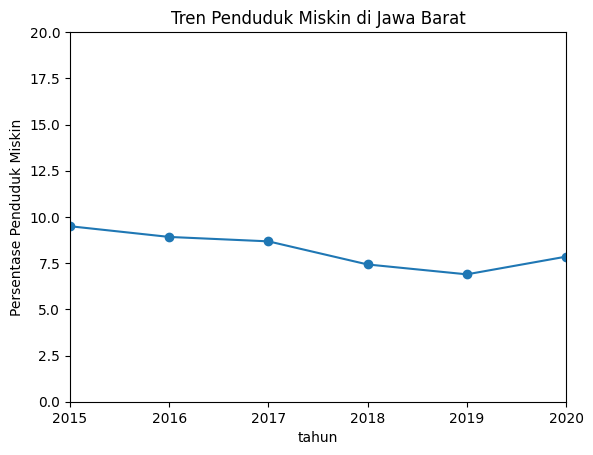

In [221]:
ax = df_percentage_miskin["JAWA BARAT"].plot(marker="o")

plt.ylim(0, top=20)
plt.ylabel("Persentase Penduduk Miskin")
plt.title("Tren Penduduk Miskin di Jawa Barat")
plt.show()

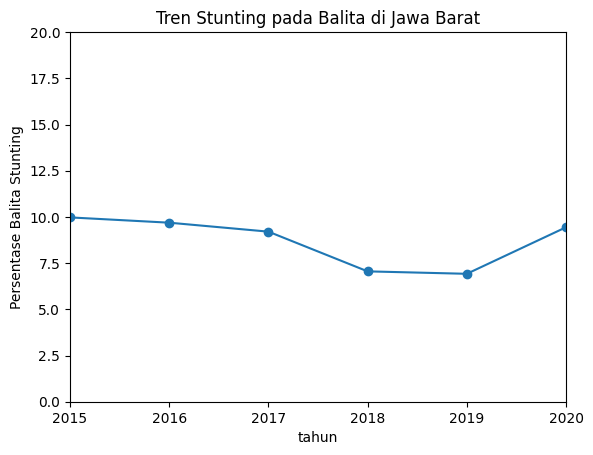

In [222]:
ax = df_persentase_stunting["JAWA BARAT"].plot(marker="o")

plt.ylim(0, top=20)
plt.ylabel("Persentase Balita Stunting")
plt.title("Tren Stunting pada Balita di Jawa Barat")
plt.show()

In [223]:
df_percentage_miskin.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA,JAWA BARAT
tahun,,,,,,,,,,,,,,,,,,,,,
2015-01-01,7.951,12.624,5.213,8.922,8.976,12.206,14.731,12.779,14.964,10.336,...,4.598,7.386,5.411,7.558,5.813,10.309,2.374,8.739,16.244,9.496
2016-01-01,7.582,11.678,4.876,8.784,8.406,11.613,13.462,11.617,13.934,10.045,...,4.320,6.982,5.023,7.260,5.909,9.727,2.321,8.564,15.585,8.917
2017-01-01,7.327,11.455,4.686,8.527,8.190,11.407,12.947,11.248,13.649,10.222,...,4.163,7.073,4.756,7.077,5.739,9.639,2.320,8.462,14.802,8.678
2018-01-01,6.620,10.037,4.329,7.105,7.210,9.803,10.679,9.258,11.878,8.048,...,3.571,5.689,4.086,5.917,4.919,8.853,2.120,7.110,12.705,7.427
2019-01-01,5.912,9.355,3.970,6.622,6.644,9.150,9.925,8.968,11.100,7.377,...,3.376,5.499,3.783,5.752,4.381,8.393,2.050,6.654,11.602,6.893


In [224]:
df_persentase_stunting.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA,JAWA BARAT
tahun,,,,,,,,,,,,,,,,,,,,,
2015-01-01,8.34,11.56,8.93,7.38,2.83,14.94,12.56,7.67,21.44,14.09,...,12.83,4.56,7.39,10.37,15.81,11.64,17.35,8.96,6.77,9.974
2016-01-01,7.52,7.92,5.40,6.87,10.40,13.42,13.42,6.81,23.49,13.82,...,6.43,8.67,11.06,7.58,14.18,12.43,7.01,10.57,14.01,9.688
2017-01-01,9.62,8.00,4.25,5.38,8.55,13.92,11.12,12.65,23.06,14.18,...,1.99,7.96,11.43,6.59,14.54,13.69,5.94,8.98,13.12,9.203
2018-01-01,7.91,6.94,4.77,1.08,6.47,6.57,10.29,12.07,20.51,18.75,...,7.56,8.24,18.18,4.80,9.75,10.10,5.41,12.13,10.79,7.054
2019-01-01,7.32,7.60,3.42,4.06,7.33,6.61,7.93,4.80,15.39,4.17,...,6.53,7.61,10.69,4.54,9.06,11.21,4.55,9.31,10.95,6.922
